In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib_fontja
import seaborn as sns
sns.set()

In [2]:
# 古典的なスタイルclassicを設定
plt.style.use('classic')

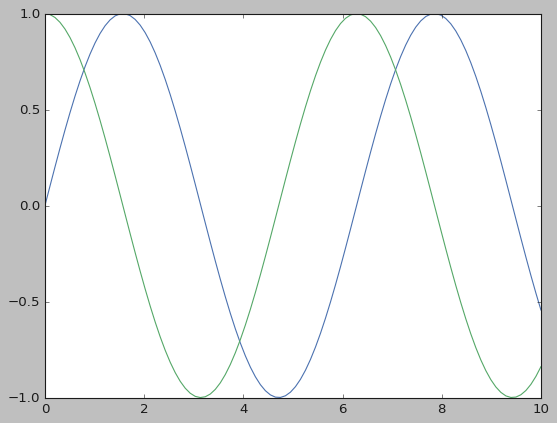

In [3]:
# インタープリタによる表記違い
# Pythonスクリプトからプロット
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()

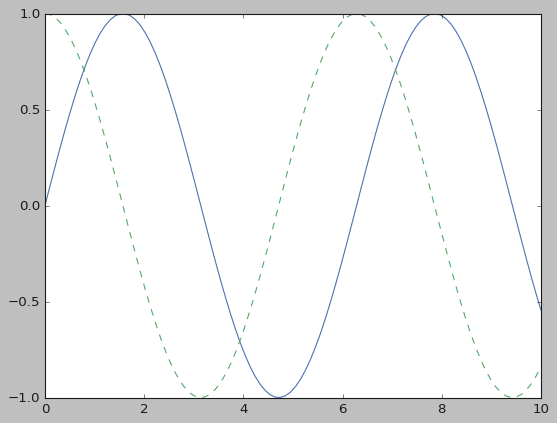

In [4]:
# IPythonシェルからプロットする場合plt.showを使用する必要なし
# Jupyter Notebookからプロット

# 静的なプロット画像をNotebookに埋め込む
%matplotlib inline

# 対話型のプロットをNotebookに埋め込む
# %matplotlib notebook

import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')


In [5]:
# 結果のファイル保存
fig.savefig('my_figure.png')

In [6]:
# vscode jupyternotebook windows_os上での文字化け対策
# 932:utf-8, 65001:shift-jis
!chcp 65001

Active code page: 65001


In [7]:

!dir -lh my_figure.png

 Volume in drive C is OS
 Volume Serial Number is 684D-5963

 Directory of c:\Users\knife\study\Git_lib\Git_lib


 Directory of c:\Users\knife\study\Git_lib\Git_lib

2024/06/02  14:52            42,343 my_figure.png
               1 File(s)         42,343 bytes
               0 Dir(s)  860,449,206,272 bytes free


In [8]:
# 保存できる拡張子の種類
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

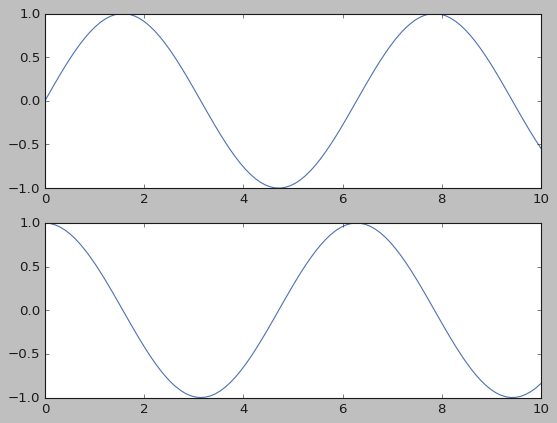

In [9]:
# matplotlibには2つのインターフェースがある
# matlabスタイル
plt.figure()    # figureを作成

# 最初のグラフを作成し、現在の座標軸に設定する
plt.subplot(2, 1, 1) # (行, 列, グラフ番号)
plt.plot(x, np.sin(x))

# 2番目のグラフを作成して、現在の座標軸設定する
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

* 上記は状態を待つ(stateful)インターフェースであると理解すること
* 現在の図(figure)と座標軸(axes)が維持され、すべてのpltコマンドはそこに作られる
* これらはplt.gcf(get current figure:現在の図の取得)およびplt.gca(get current axes:現在の座標軸の取得)関数で取得できる
* こうした状態を待つインターフェースでは、単純なプロットでは高速で便利
  * ただし2つ目の図を追加後、最初の図に何かを追加する等したいときには向かない

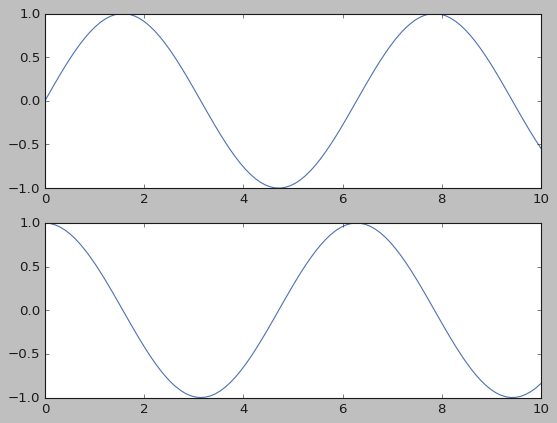

In [10]:
# オブジェクト指向インターフェース
# 図を細かく制御したい場合に使う
# オブジェクト指向インターフェースは
# 「アクティブ」な現在の図や座標軸の概念に依存するのではなく、明示的な
# FigureオブジェクトとAxesオブジェクトに対するメソッドとしてプロット関数が定義される

# 最初にプロットのグリッドを作成する
# axは、2つの座標軸オブジェクトの配列
fig, ax = plt.subplots(2)

# オブジェクトのplotメソッドを呼び出す
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

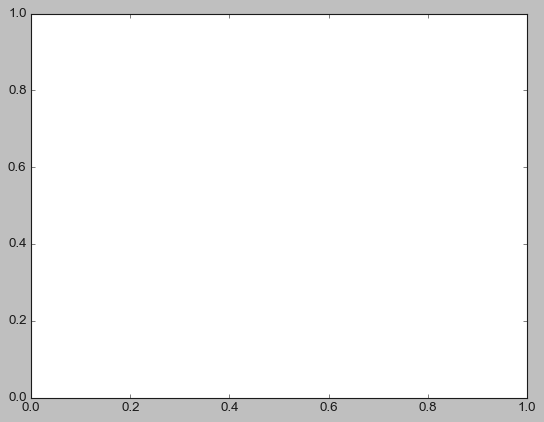

In [11]:
fig = plt.figure()
ax = plt.axes()
plt.style.use('seaborn-v0_8-whitegrid')

* figure(クラスplt.Figureのインスタンス)は、軸、グラフィックス、テキスト、ラベルなどすべてのオブジェクトを含む1津のコンテナと考えてよい
* axes(クラスplt.Axesのインスタンス)は上に示したような、目線、グリッド、ラベルを持つ協会
* 最終的には、可視化されるものを構成するプロット要素をすべて囲む

* axesを作成したら、ax.plot関数を使用してデータをプロットできる

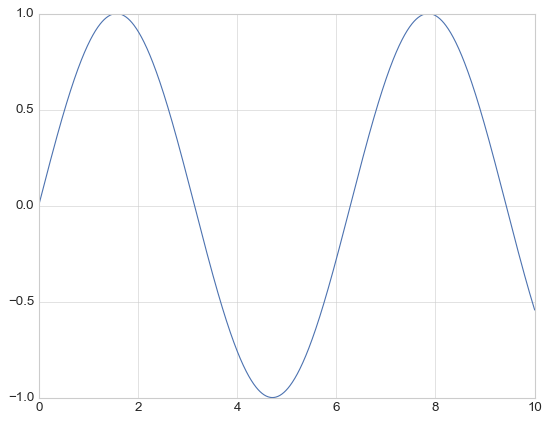

In [12]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));
# 末尾にセミコロンを置くと、テキスト出力を抑制できる

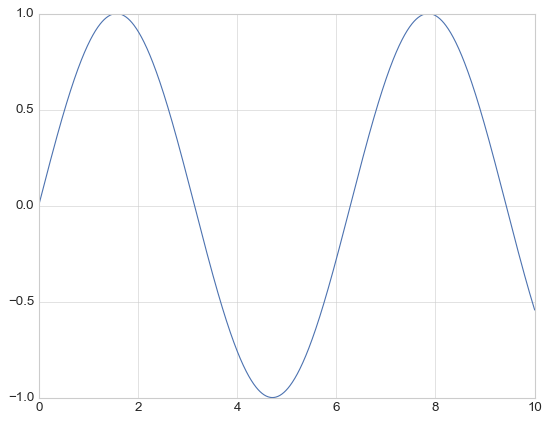

In [13]:
# MATLABスタイル
plt.plot(x, np.sin(x));

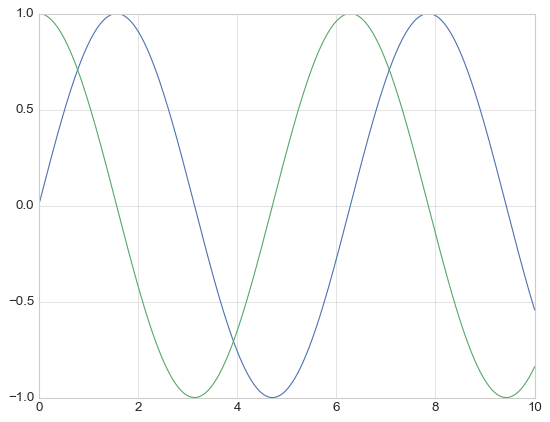

In [14]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

## プロット制御:線の色とスタイル
* 色の変更は、colorキーワードに色を表す文字列引数を指定する

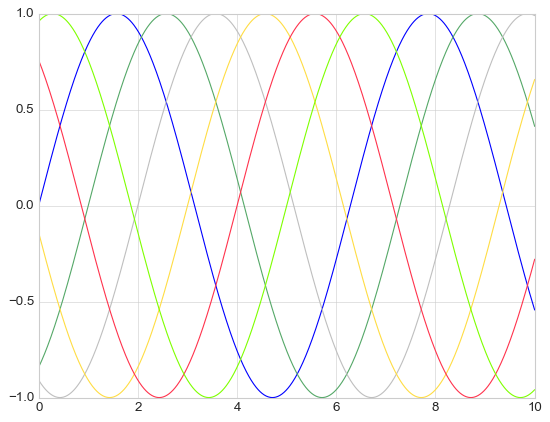

In [15]:
plt.plot(x, np.sin(x - 0), color='blue')        # 色の名前で指定
plt.plot(x, np.sin(x-1), color='g')             # カラーコード(rgbcmyk)
                                                # による指定
plt.plot(x, np.sin(x-2), color='0.75')          # 0から1の間のグレースケール
                                                # を指定
plt.plot(x, np.sin(x-3), color='#FFDD44')       # 16進コードで指定
                                                # (RRGGBBを00からFFで表す)
plt.plot(x, np.sin(x-4), color=(1.0,0.2,0.3))   # 0から1のRGB値をタプルで指定
plt.plot(x, np.sin(x-5), color='chartreuse');   # サポートされている
                                                # HTMLカラーネームで指定

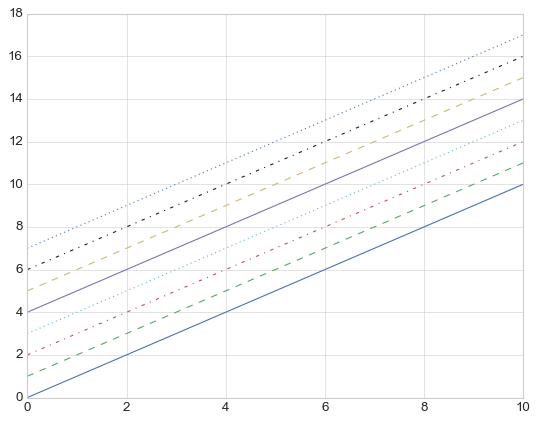

In [16]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following code:
plt.plot(x, x + 4, linestyle='-')   # 直線
plt.plot(x, x + 5, linestyle='--')  # 破線
plt.plot(x, x + 6, linestyle='-.')  # 一転鎖線
plt.plot(x, x + 7, linestyle=':');  # 点線

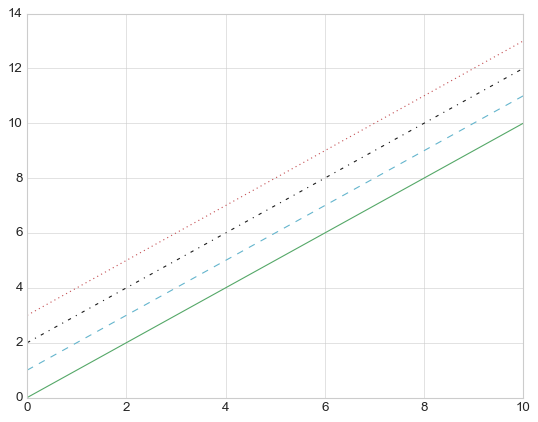

In [17]:
# linestyleとcolorの指定を1つの一引数にまとめれる
plt.plot(x, x + 0, '-g')
plt.plot(x, x + 1, '--c')
plt.plot(x, x + 2, '-.k')
plt.plot(x, x + 3, ':r');

## プロットの制御:座標軸の範囲
* Matplotlibは軸の範囲を自動的かつ最適に選択しますが、場合によっては細かく制御したい場合もある

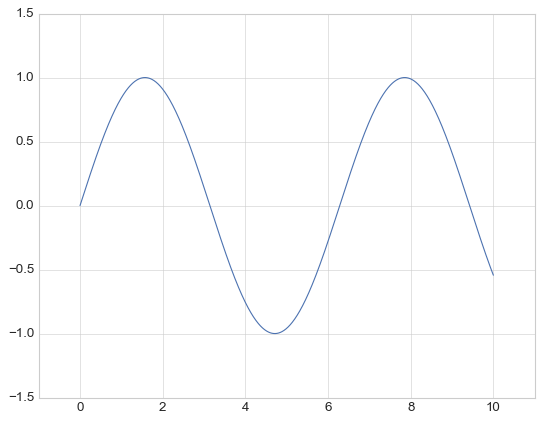

In [18]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

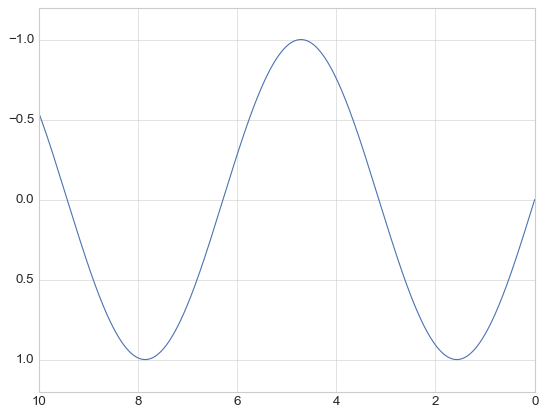

In [19]:
# x, y軸を逆に表示
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

* plt.axisメソッド(「axes」は「e」、「axis」は「i」である点に注意)のさらに有益な使用方法として、より定性的に軸の範囲を指定できる

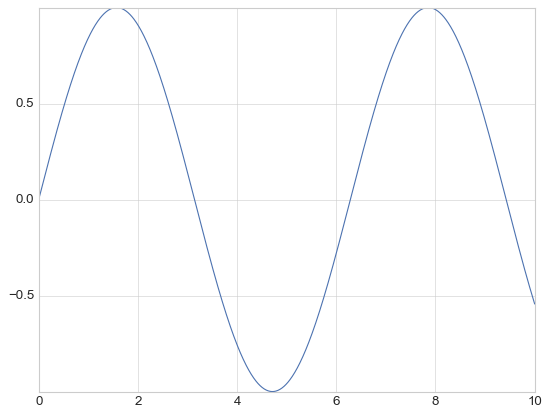

In [20]:
# 周辺の境界を自動的に狭くする = tight
plt.plot(x, np.sin(x))
plt.axis('tight');

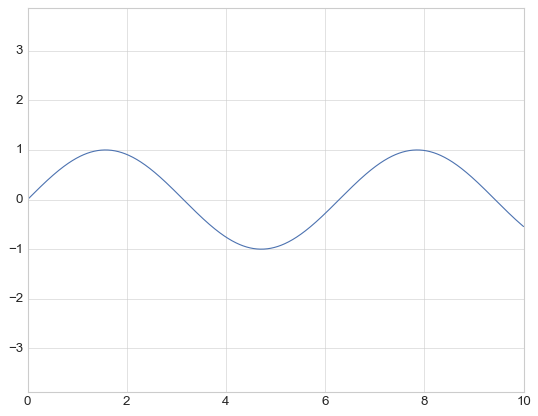

In [21]:
# X軸とY軸が視覚的に同じ比率なるように軸比を等しくする = equals
plt.plot(x, np.sin(x))
plt.axis('equal');

* その他の軸のオプションとして、'on'、'off'、'square'、'image'等がある

## プロットのラベル付け
* タイトル、軸ラベル、単純な凡例付け方法

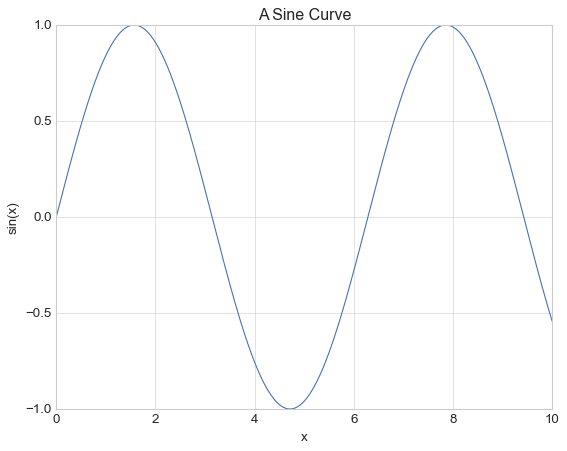

In [22]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

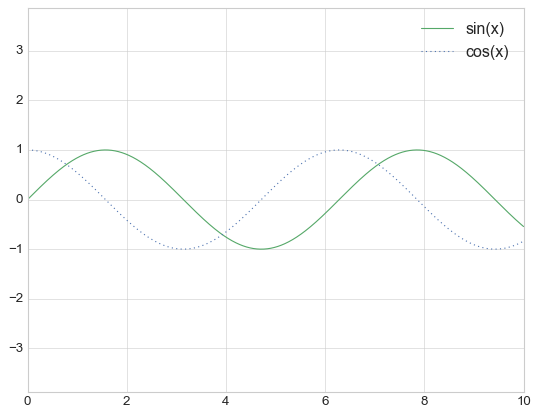

In [23]:
# 凡例の追加
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

## MATLABスタイルとオブジェクト指向のメソッドの関係
* plt.xlabel -> ax.set_xlabel
* plt.ylabel -> ax.set_ylabel
* plt.xlim -> ax.set_xlim
* plt.ylim -> ax.set_ylim
* plt.title -> ax.set_title

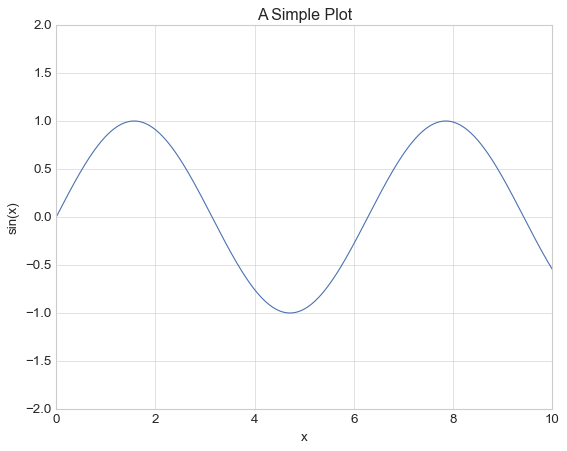

In [24]:
# オブジェクト指向を使った描画
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0,10), ylim=(-2,2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

## 単純な散布図

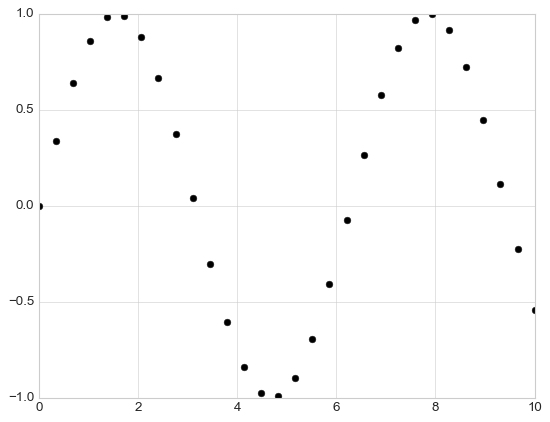

In [25]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black')

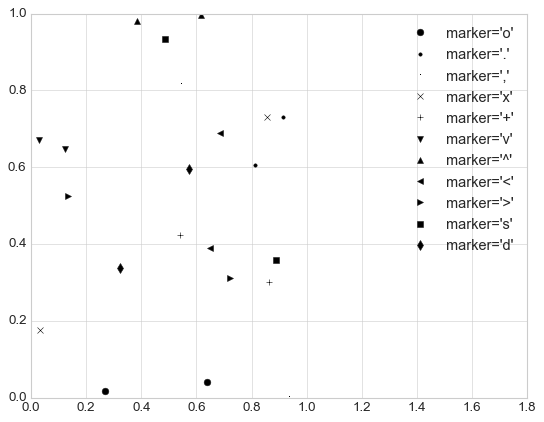

In [26]:
# マーカーの種類
rng = np.random.default_rng(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.random(2), rng.random(2), marker, color='black',
             label=f"marker='{marker}'")
plt.legend(numpoints=1, fontsize=13)
plt.xlim(0, 1.8);

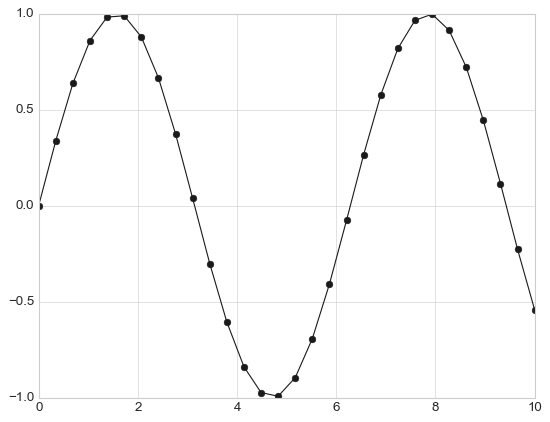

In [27]:
# 線コード、点マーカー、カラーコード使用した例
plt.plot(x, y, '-ok')

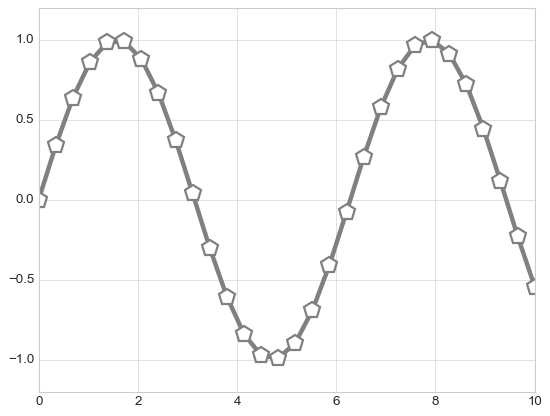

In [28]:
# キーワード引数を使用した例
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

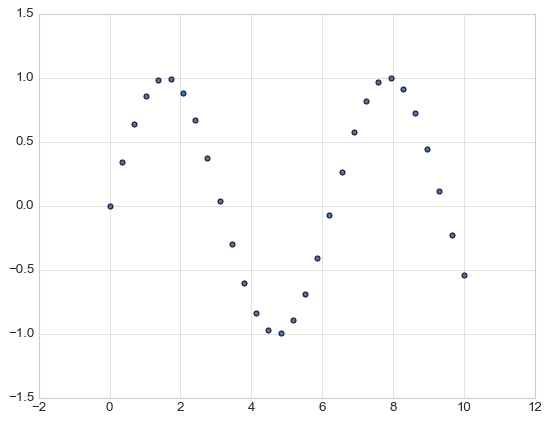

In [29]:
# plt.scatterを使った散布図
plt.scatter(x, y, marker='o')

* plt.plotとの主な違いは、それぞれの点のプロパティ(サイズ、面の色、境界線の色などを)個別に制御でき、マッピングできる

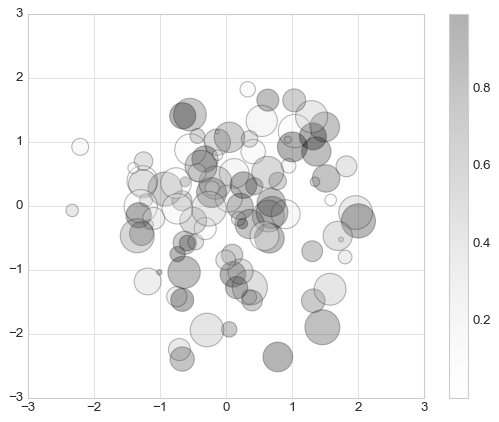

In [30]:
rng = np.random.default_rng(0)
x = rng.normal(size=100)
y = rng.normal(size=100)
colors = rng.random(100)
sizes = 1000 * rng.random(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3)
plt.colorbar();

* color引数はカラースケールに自動的にマッピングされる
* size引数はピクセル数で指定している
* 色と大きさを使うと多次元データの可視化ができる

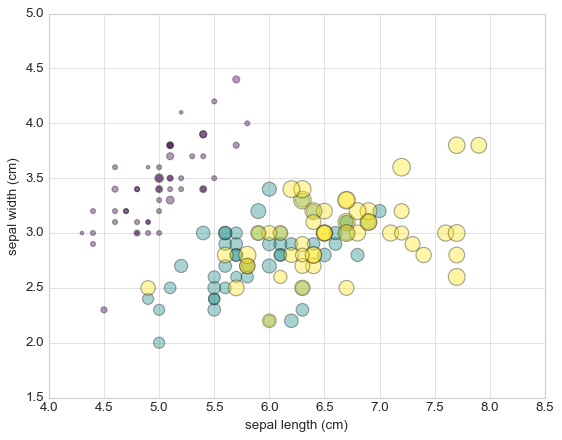

In [31]:
# scikit-learnのアイリスデータ可視化した例
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.4,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

* plt.plot, plt.scatterの使い分けはデータセットが数千ポイントを超えるとplt.plotの方が効率良い
* plt.scatterは詳細に設定できるのでポイント毎に処理されるため

## 誤差の可視化
* あらゆる科学的な実験において、不確かさの正確な評価は、測定値を正しく報告することと同程度に重要

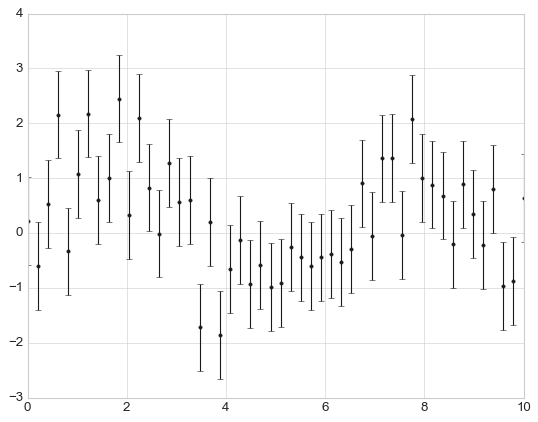

In [32]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');


### 連続誤差
* エラーバーを連続量で表示される方が良い時もある
* plt.plot, plt.fill_between等の基本機能を組み合わせて実装できる

In [33]:
# ガウス過程回帰を例としたとき
from sklearn.gaussian_process import GaussianProcessRegressor
# モデルを定義し、データを作成する
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# ガウス過程回帰によるあてはめ
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, dyfit = gp.predict(xfit[:, np.newaxis], return_std=True)

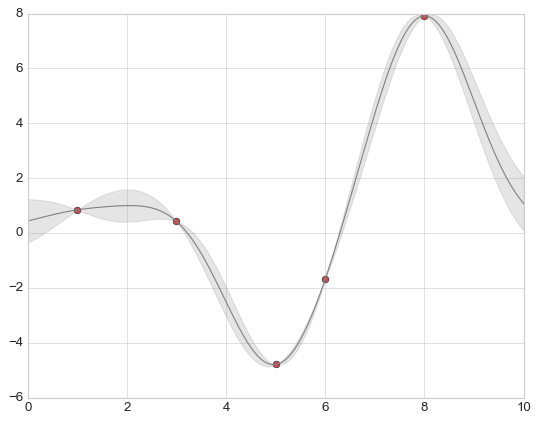

In [34]:
# グラフ描画
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit -dyfit, yfit + dyfit,
                 color = 'gray', alpha=0.2)
plt.xlim(0, 10);

* fill_between呼び出しシグニチャではxに値を渡し、yの下限と上限を渡しその間の領域を埋めている
* 結果の図は、ガウス過程回帰アルゴリズムが行っていることを直観的に示す

## 密度と等高線図
* 等高線や色分けされた領域を使用して3次元データを2次元で表示すると便利な時がある
* Matplotlibでは3つの関数を提供している
* 等高線図はplt.contour
* 塗りつぶし等高線図用のplt.contourf
* 画像として表示するplt.imshow

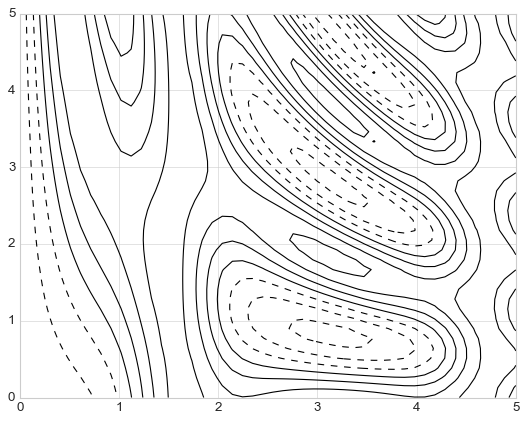

In [35]:
# 3次元関数の可視化
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10+y*x) * np.cos(x)

# 等高線
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, colors='black');

* 単色の等高線図は、負の値を破線、制の値を実践で表す

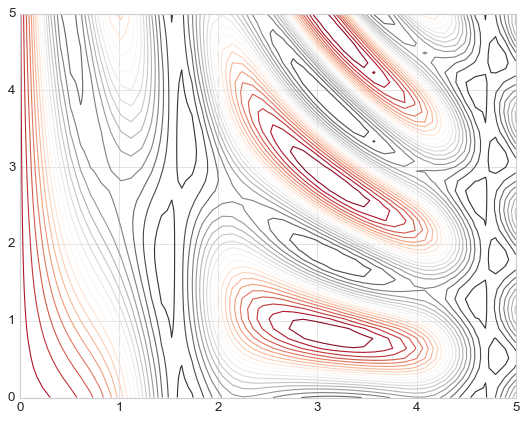

In [36]:
# cmap引数でカラーマップを指定し、データ範囲内を20No等間隔で区切る
plt.contour(X, Y, Z, 20, cmap='RdGy');

* RdGy(Red-Grayの略)のカラーマップを使った
* これは分散型のデータ(0を中心に政府の変化があるデータ)に適している
* plt.cm.予測変換キーでどのようなカラーマップが存在するのかを調べられる

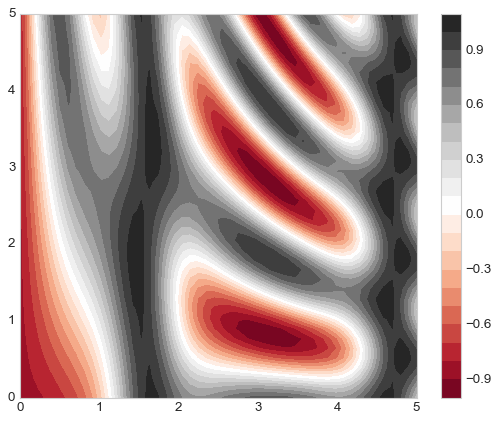

In [37]:
# plt.contourf関数を使う
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

* カラーバーにより黒い領域が山、赤い領域が谷だと明確になった
* 色の変化を離散的から連続的に変えたい
* 等高線の数を非常に多くするのではなくimshowメソッドを使う

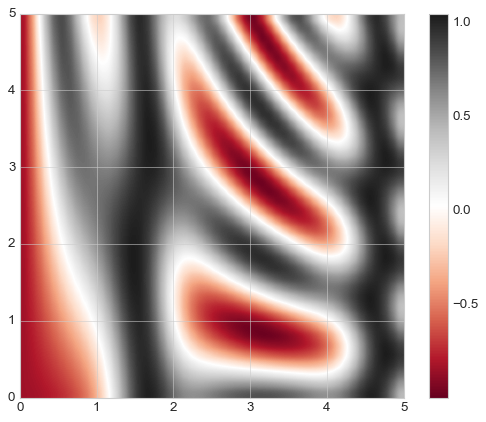

In [38]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy',
           interpolation='gaussian', aspect='equal')
plt.colorbar();

* imshowの潜在的な問題として以下がある
* xとyのグリッドを受け入れないため、画像の範囲を[xmin, xmax, ymin, ymax]の形式で指定する
* デフォルトでは標準的な画像配列定義に従い左上を原点とするが、ほとんどの等高線図は左下を原点とするため、格子状データを表示する際に変更しなければならない
* 入力データと一致するように軸のアスペクト比を自動的に調整される。これはaxpectオプションで変更できる

* 等高線図と画像を組み合わせると便利な場合がある
* 半透明な背景画像に等高線を重ねる

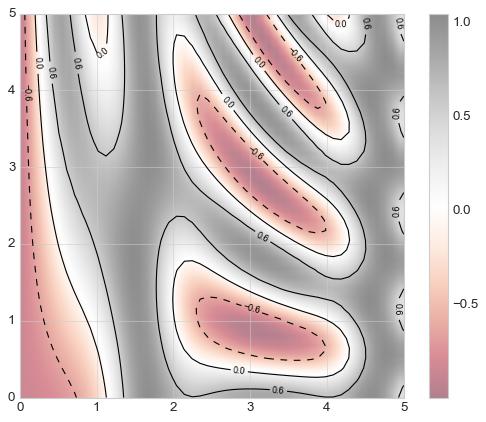

In [39]:
countours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(countours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

## ヒスとグラム、ビニング、密度
* 一行のコードで基本的なヒストグラムを作成できる

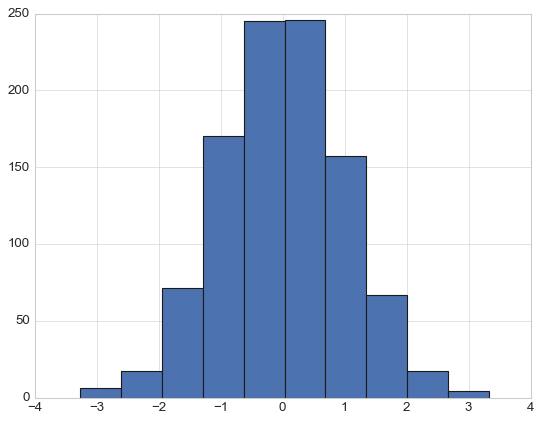

In [40]:
# 基本的なヒストグラム関数
rng = np.random.default_rng(1701)
data = rng.normal(size=1000)

plt.hist(data);

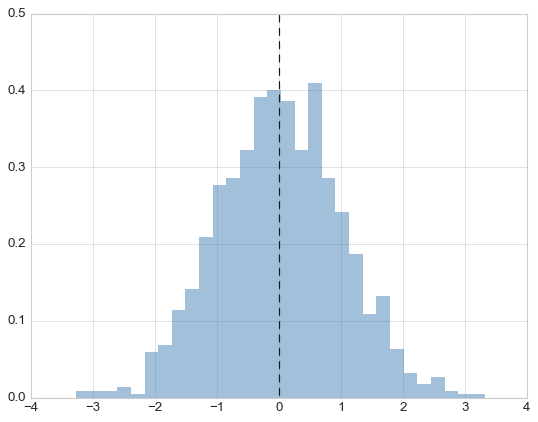

In [41]:
# カスタマイズしたヒストグラム
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
plt.fill_between([0,0], 0, 0.5, linestyle='--');

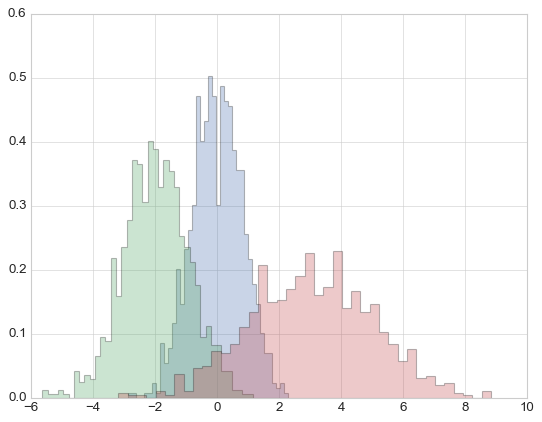

In [42]:
# 異なる分布のヒストグラムを比較する
x1 = rng.normal(0, 0.8, 1000)
x2 = rng.normal(-2, 1, 1000)
x3 = rng.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [43]:
# ヒスとグラムの計算を行うだけの場合
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 23 241 491 224  21]


In [44]:
# 2次元のヒストグラムとビニング

# データの作成
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = rng.multivariate_normal(mean, cov, 10000).T

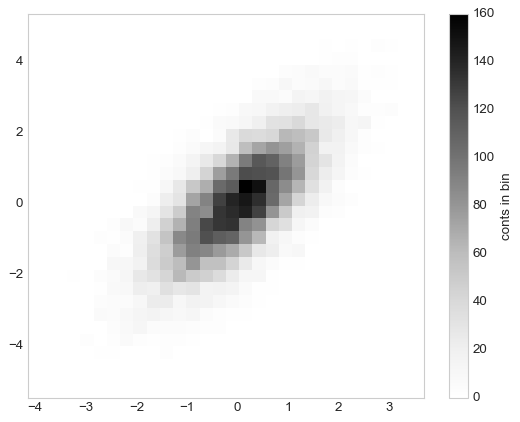

In [45]:
plt.hist2d(x, y, bins=30)
cb = plt.colorbar()
cb.set_label('conts in bin')

* plt.histと同様にPlt.hist2dには、プロットとビニングを微調整するオプションを多数持つ
* さらにPlt.histにはnp.histogramが対応しているように、plt.hist2dにはnp.histogram2dが対応している

In [46]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
print(counts.shape)

(30, 30)


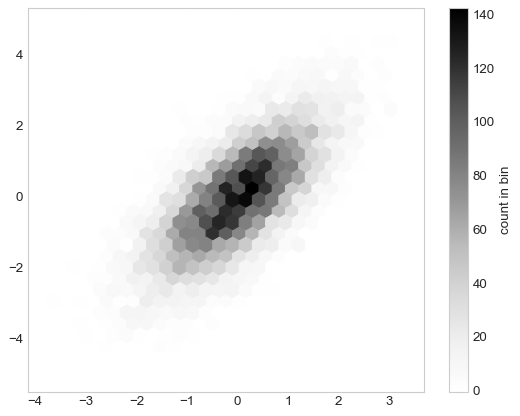

In [47]:
# plt.hexbin:六角形のビニング
plt.hexbin(x, y, gridsize=30)
cb = plt.colorbar(label='count in bin')

## カーネル密度推定
* 多次元の密度を推定して表現する方法に、カーネル密度推定もある
* KDE:Kernel Density Estimation

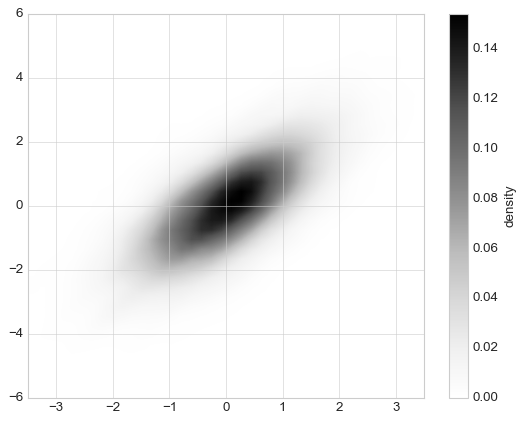

In [48]:
from scipy.stats import gaussian_kde

# 配列のサイズを[N次元, Nサンプル]に揃える
data = np.vstack([x, y])
kde = gaussian_kde(data)

# 規則的なグリッド上で評価する
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# 結果を画像として表示
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6])
cb = plt.colorbar()
cb.set_label("density")


* KDEはバンド幅を持ち、スライドを移動させるようにバンド幅を移動すると、細かさと滑らかさが効果的に変化する
* 適切なバンド幅選択に関して多数の文献がある
* 最適なバンド幅の見つけ方は経験則を使用する
* SciPyエコシステムはほかにもsklearn.neighbors.KernelDensity, statsmodels.nonparametric.KDEMultivariate等に様々なKDEを提供し、それぞれ長所・短所がある
* seabornライブラリだとより簡潔なAPIを提供してくれる

## 凡例のカスタマイズ

In [49]:
# 補足:style関数一覧の確認方法
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

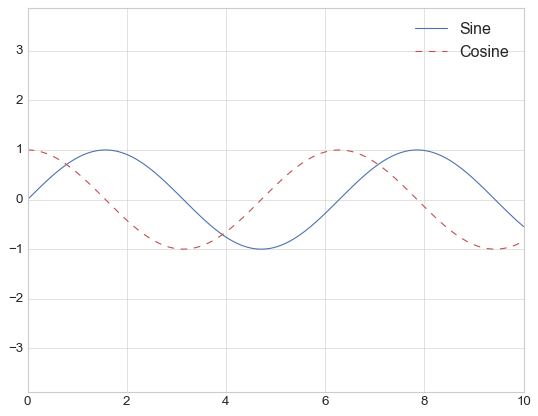

In [50]:

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend()

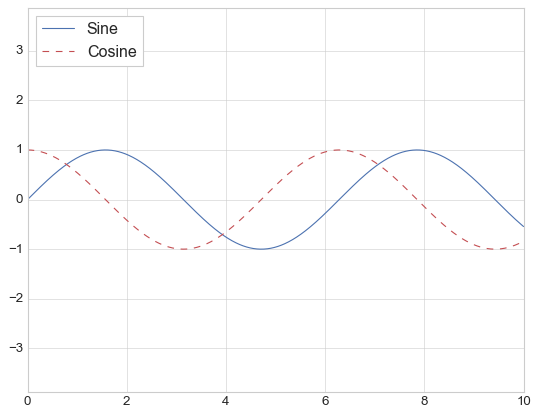

In [51]:
ax.legend(loc='upper left', frameon=True)
fig

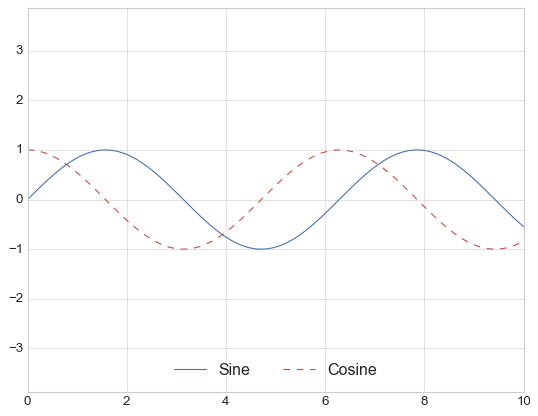

In [52]:
# ncolパラメータを使用した凡例の列数を指定
ax.legend(loc='lower center', ncol=2)
fig

* 凡例レイアウトに角丸(fancybox), 影付き, フレームの透明度(alpha値)を制御, テキストの周囲の余白調整も可能

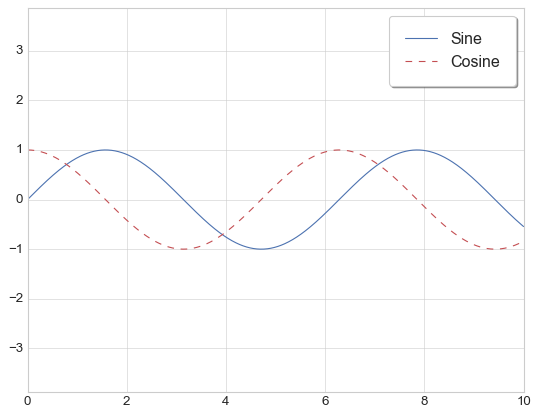

In [53]:
ax.legend(frameon=True, fancybox=True, framealpha=1,
          shadow=True, borderpad=1)
fig

* 凡例に表示する要素とラベルを微調整できる

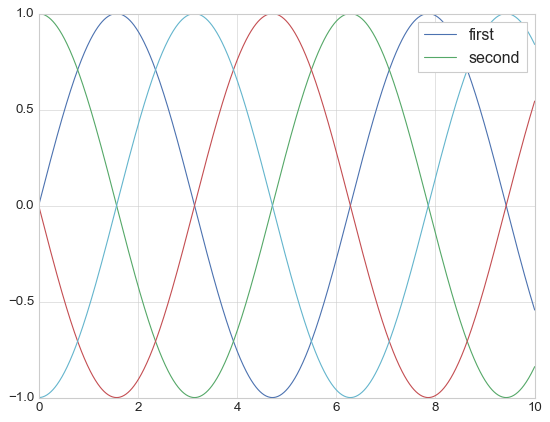

In [54]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# linesは、plt.Line2Dインスタンスのリスト
# 凡例に2つ分のデータと名前を紐づけている
plt.legend(lines[:2], ['first', 'second'], frameon=True);

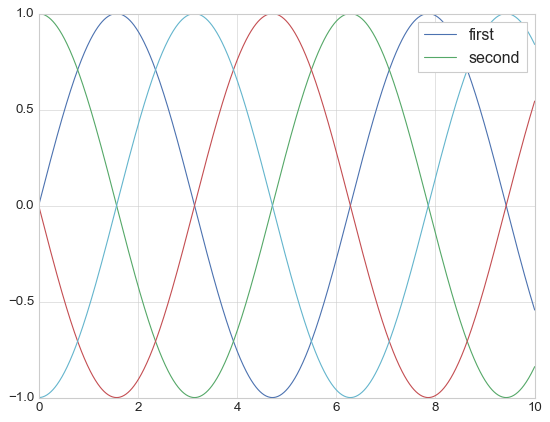

In [55]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(frameon=True)

## 点の大きさの凡例
* デフォルトの凡例では不十分な時がある
* データの特徴を点の大きさで示すプロットの凡例を用意する

In [63]:
import pandas as pd
cities = pd.read_csv(r'./california_cities.csv')

In [66]:
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


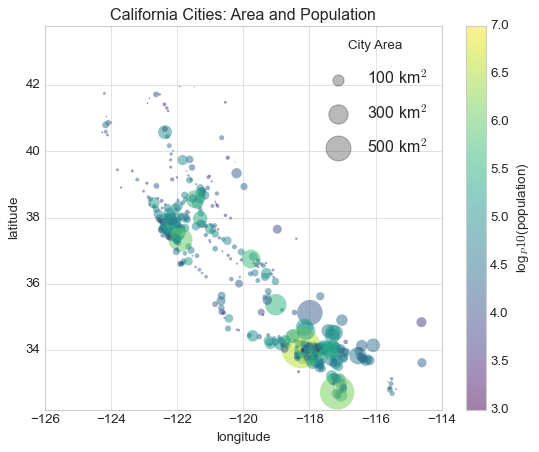

In [68]:
# 着目しているデータを抜き出す
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# 各拠点に色と大きさを指定した散布図をプロットする、ラベルは付加しない
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_P{10}$(population)')
plt.clim(3, 7)

# 凡例を加える
# 点の大きさとラベルを指定したうえで、空のリストをプロットする
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
    plt.legend(scatterpoints=1, frameon=False, labelspacing=1,
               title='City Area')
    
    plt.title('California Cities: Area and Population');

* 凡例は